<a href="https://colab.research.google.com/github/mion158/data-mining-assignments/blob/main/info.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/mion158/data-mining-assignments/main/Principal%20component%20analysis/telescope_data.csv', index_col=0)

# Remove null and na values
df.dropna()


print(df.head())

    fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g  


In [4]:
# Extract the class classes
classes = df['class']
data_matrix = df.drop(columns='class')

data_matrix

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620
...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166


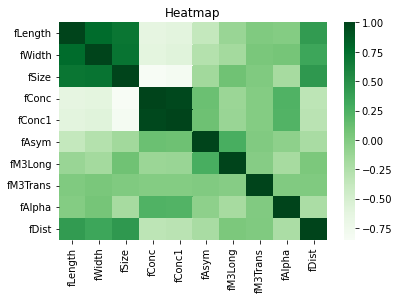

In [5]:
# get the correlation matrix 
correlation_matrix = data_matrix.corr()

ax = plt.axes()
sns.heatmap(correlation_matrix, cmap='Greens', ax=ax)
ax.set_title('Heatmap')
plt.show()

In [6]:
# Perform eigendecomposition using `np.linalg.eig` 
eigenvalues, eigenvectors = np.linalg.eig(correlation_matrix)
print(f'Eigenvalues length: {eigenvalues.size}, Original Number of Features: {data_matrix.shape[1]}')

Eigenvalues length: 10, Original Number of Features: 10


In [7]:
# Order the eigenvalues by ordering the indices of the eigenvalues using `argsort`, and use [::-1] to order them from greatest to smallest
indices = eigenvalues.argsort()[::-1]  
eigenvalues = eigenvalues[indices]
eigenvectors = eigenvectors[:, indices]

print(eigenvalues.shape, eigenvectors.shape)

(10,) (10, 10)


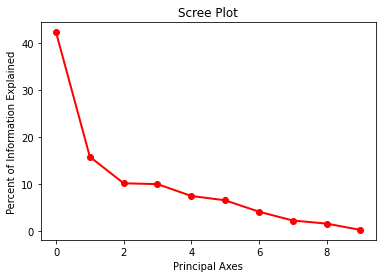

In [8]:
# Find the percentages of information for each eigenvector, which is generated by the proportion of its eigenvalues to the sum of all eigenvalues
information_proportions = eigenvalues / eigenvalues.sum()
information_percents = information_proportions * 100

# Plot the principal axes vs the information proportions for each principal axis
plt.figure()
plt.plot(information_percents, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Axes')
plt.ylabel('Percent of Information Explained')
plt.show()

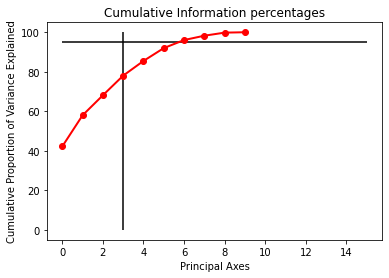

In [9]:
# Find the cumulative sum of the percentages
cumulative_information_percents = np.cumsum(information_percents)

# Plot the cumulative percentages array
plt.figure()
plt.plot(cumulative_information_percents, 'ro-', linewidth=2)

# Also plot a horizontal line indicating the 95% mark, and a vertical line for the third principal axis
plt.hlines(y=95, xmin=0, xmax=15)
plt.vlines(x=3, ymin=0, ymax=100)
plt.title('Cumulative Information percentages')
plt.xlabel('Principal Axes')
plt.ylabel('Cumulative Proportion of Variance Explained')
plt.show()

# Mục mới